In [2]:
import graphs
import graphs.finance as finance
import numpy as np
import matplotlib.pyplot as plt
import palettable

In [3]:
discount_rates = np.linspace(0.025, 0.20)

project_life = 20

CRFs = finance.CRF(project_life, discount_rates)

In [4]:

uptime = 0.90
efficiency = 0.75
hours_per_year = 8760
H2_HHV = 39.4 #kWh/kg
kg_per_kw = hours_per_year/(H2_HHV/efficiency)


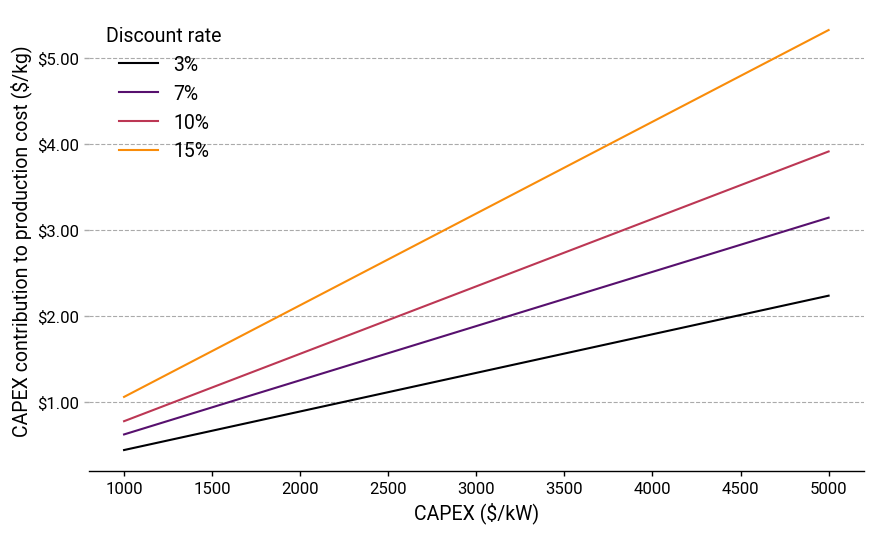

In [5]:
import graphs.plotutils
import matplotlib.ticker as ticker

graphs.plotutils.disable_graph_frame()
graphs.plotutils.set_ygrid()
fig, ax = plt.subplots(1,1)

ax.set_prop_cycle('color', palettable.matplotlib.Inferno_5.mpl_colors)
# H2_CAPEX = np.array([1000, 1500, 2000, 2500, 3000]) #$/kW

H2_CAPEX = np.linspace(1000, 5000)
H2_CAPEX_kg = H2_CAPEX/kg_per_kw

discount_rates = np.array([0.03, 0.07, 0.10, 0.15])
for rate in discount_rates:
    CRF = finance.CRF(project_life, rate)
    LCOH = H2_CAPEX_kg/uptime*CRF
    ax.plot(H2_CAPEX, LCOH, label=f"{rate:.0%}")

fig.set_size_inches(10, 6)
ax.legend(title="Discount rate")
ax.set_ylabel("CAPEX contribution to production cost ($/kg)")
ax.set_xlabel("CAPEX ($/kW)")
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("${x:.2f}"))

Text(0.5, 0, 'Electricity price [$/MWh]')

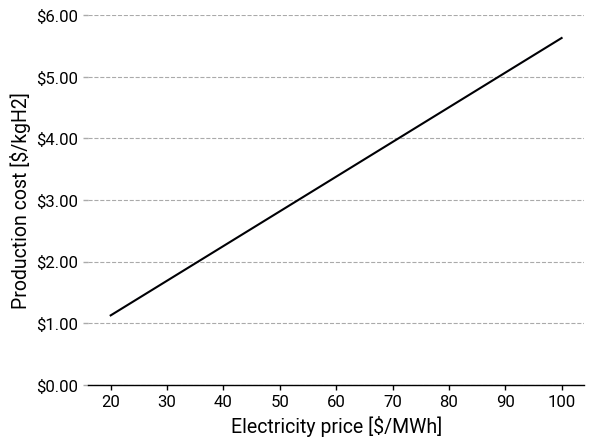

In [16]:
import matplotlib.ticker as ticker

electricity_price = np.arange(20, 101, 10) #$/MWh

hydrogen_HHV = 39.4 #kWh/kg
plant_efficiency = 0.7

plant_consumption = hydrogen_HHV/plant_efficiency #kWh/kg

prod_cost = []

for price in electricity_price:
    prod_cost.append(plant_consumption*price/1000)
    
fig, ax = plt.subplots(1,1)
ax.set_prop_cycle('color', palettable.matplotlib.Inferno_5.mpl_colors)
ax.plot(electricity_price, prod_cost)

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("${x:.2f}"))
ax.set_ylim(0, 6.0)
ax.set_ylabel("Production cost [$/kgH2]")
ax.set_xlabel("Electricity price [$/MWh]")